In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os, json, cv2, random, shutil
from detectron2.engine import DefaultPredictor
from skimage.morphology import thin
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
""" https://github.com/mameng1/split-coco-datasets/blob/master/pycocoDemo.ipynb
    https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=Ya5nEuMELeq8
"""

' https://github.com/mameng1/split-coco-datasets/blob/master/pycocoDemo.ipynb\n    https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=Ya5nEuMELeq8\n'

In [2]:
dataDir='./Dataset'
dataType='test'
annFile='{}/{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
diente raiz

COCO supercategories: 
diente


In [4]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['diente','raiz']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [5])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

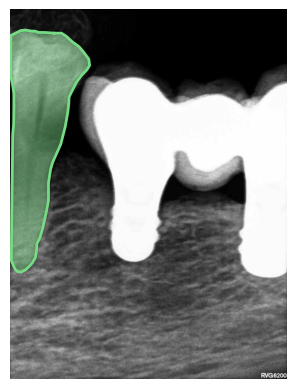

In [5]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(dataDir+"/data/"+img["file_name"])
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [30]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
"""
cfg = get_cfg()
cfg.MODEL.WEIGHTS = os.path.join("output/", "model_final_2500iter.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold

"""
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 25000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.TEST.DTECTIONS_PER_IMAGE = 25
cfg.MODEL.WEIGHTS = os.path.join("output/", "model_final_25000iter.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

In [31]:
register_coco_instances("dataset_test", {}, "Dataset/test.json", "Dataset/data")


AssertionError: Dataset 'dataset_test' is already registered!

In [32]:
test_metadata=MetadataCatalog.get("dataset_test")
test_metadata

namespace(name='dataset_test',
          json_file='Dataset/test.json',
          image_root='Dataset/data',
          evaluator_type='coco')

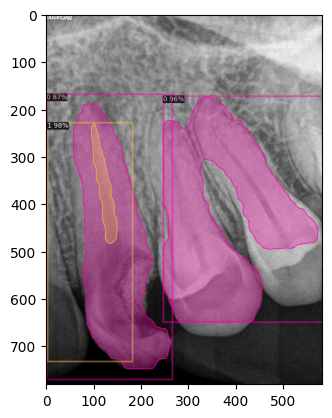

In [35]:
from detectron2.utils.visualizer import ColorMode
# im = cv2.imread(dataDir+"/unlabeled_external/augmented_original.png") # antigua relativo
# im = cv2.imread(dataDir+"/data/16a.jpg") # Buena para raiz
# im = cv2.imread(dataDir+"/data/30a.jpg") # Nada con 2500
# im = cv2.imread(dataDir+"/data/8a.jpg") # Raiz a medias
# im = cv2.imread(dataDir+"/data/33A.jpg") # Completa
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
               metadata=test_metadata, 
               scale=0.5, 
               instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

In [21]:
outputs

{'instances': Instances(num_instances=0, image_height=1148, image_width=872, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64), pred_masks: tensor([], device='cuda:0', size=(0, 1148, 872), dtype=torch.bool)])}

In [11]:
capa = predicciones["instances"].pred_masks.to("cpu").numpy()[0]

In [12]:
capa_thin=thin(capa)

In [13]:
capa_thin

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])